# Data Loading and Description
#### 1. Import libraries.
#### 2. Load data from 'factory_test.
#### 3. Provide a description of its content.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [49]:
# data = pd.read_csv('factory_test_data.csv')
data = pd.read_csv('factory_test_data.csv')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Y1      51 non-null     int64 
 1   X2      51 non-null     object
 2   Y2      51 non-null     object
 3   X3      51 non-null     object
 4   Y3      51 non-null     object
 5   X4      51 non-null     object
 6   Y4      51 non-null     object
 7   X5      51 non-null     object
 8   Y5      51 non-null     object
dtypes: int64(1), object(8)
memory usage: 3.7+ KB
None


In [50]:
data.head(5)

,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5
0,1491,18,16.8,14,13.33,12,11.12,9,8.33
1,1491,[],[],[],[],[],[],[],[]
2,2004,18,17.94,14,13.99,12,11.72,9,8.65
3,1493,[],[],[],[],[],[],[],[]
4,1497,18,18,14,13.59,12,12.91,9,7.82


#### we can see that the columns (instead of Y1) is String type.
#### in addition, there are missing values that represented by '[]' , which located in full row
#### so we will clean our data from missing values

# Visualization and Explanation

In [51]:
# data =pd.read_csv('factory_test_data.csv')
file_path = 'C:/Users/user/Downloads/Assignment/factory_test_data.csv'
data = pd.read_csv(file_path)
data= data.applymap(lambda x: pd.to_numeric(x, errors='coerce'))
data = data.dropna()

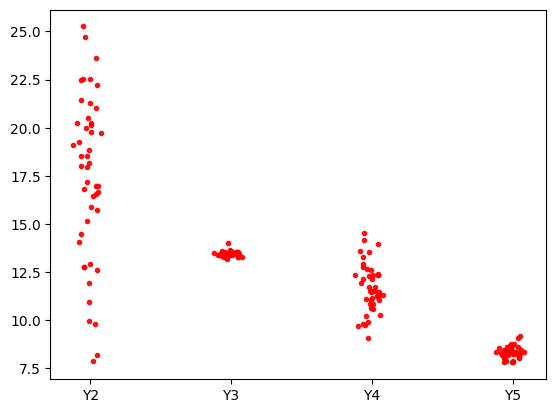

In [52]:
columns=[ 'Y2', 'Y3', 'Y4', 'Y5']


fig, ax = plt.subplots()

# Add some random "jitter" to the x-axis
x = np.random.normal(1, 0.04, size=len(data[columns]))

# Plot a strip plot for each column
for i, column in enumerate(columns):
    if 'Y' in column and 'Y1' not in column:
        ax.plot(x + i, data[column], 'r.', alpha=0.9)

ax.set_xticks(range(1, len(columns) + 1))
ax.set_xticklabels(columns)

plt.show()

### 
In this context, we observe that the data is distributed unevenly, with Y5 showing a more concentrated pattern, while Y2 displays a scattered distribution. To address this issue, we aim to normalize the data to ensure that the values in one variable do not significantly influence or overshadow the values in another variable.






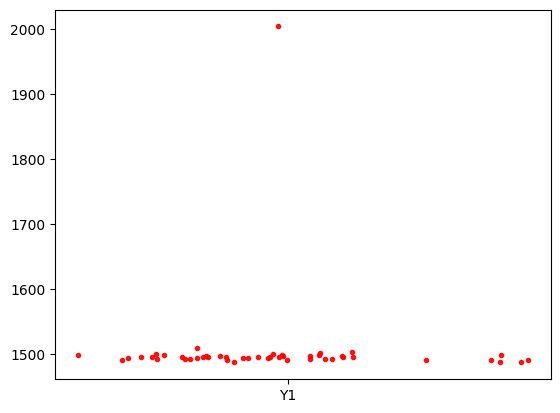

In [53]:
columns=[ 'Y1']


fig, ax = plt.subplots()

# Add some random "jitter" to the x-axis
x = np.random.normal(1, 0.04, size=len(data[columns]))

# Plot a strip plot for each column
for i, column in enumerate(columns):
    if 'Y1'  in column:
        ax.plot(x + i, data[column], 'r.', alpha=0.9)

ax.set_xticks(range(1, len(columns) + 1))
ax.set_xticklabels(columns)

plt.show()

### Based on our observation, it is evident that we should remove the row where Y1 is equal to 2004, as it has a considerable impact on the data.






# Preprocessing
#### 1. set all type to numeric and removing nunmumeric
#### 2. removing outlayer data
#### 3. normalize data

#### Upon observation, I identified a device with a Y1 value of 2004, prompting me to make the decision to exclude it from the dataset.






In [54]:
data= data[data['Y1']!=2004]
data.describe(include='all')

,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5
count,46.000000,46.0,46.000000,46.0,46.000000,46.0,46.000000,46.0,46.000000
mean,1495.130435,18.0,17.414783,14.0,13.440652,12.0,11.672826,9.0,8.339783
std,4.063981,0.0,4.322280,0.0,0.095322,0.0,1.240284,0.0,0.295556
min,1487.000000,18.0,7.870000,14.0,13.190000,12.0,9.100000,9.0,7.810000
25%,1493.000000,18.0,14.647500,14.0,13.392500,12.0,10.917500,9.0,8.192500
50%,1495.000000,18.0,18.075000,14.0,13.445000,12.0,11.495000,9.0,8.315000
75%,1497.000000,18.0,20.260000,14.0,13.517500,12.0,12.357500,9.0,8.517500
max,1510.000000,18.0,25.260000,14.0,13.660000,12.0,14.560000,9.0,9.160000


### Data normalization:

In [55]:
normalize_data={}
for column_to_normalize in data.columns :
    if 'Y' in column_to_normalize :
        min_val_data = data[column_to_normalize].min()
        max_val_data = data[column_to_normalize].max()
        normalize_data[column_to_normalize]={'min':min_val_data , 'max':max_val_data}
        data[column_to_normalize] = (data[column_to_normalize] - min_val_data) / (max_val_data - min_val_data)

In [56]:
data.describe(include='all')

,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5
count,46.000000,46.0,46.000000,46.0,46.000000,46.0,46.000000,46.0,46.000000
mean,0.353497,18.0,0.548866,14.0,0.533302,12.0,0.471214,9.0,0.392432
std,0.176695,0.0,0.248550,0.0,0.202812,0.0,0.227158,0.0,0.218930
min,0.000000,18.0,0.000000,14.0,0.000000,12.0,0.000000,9.0,0.000000
25%,0.260870,18.0,0.389735,14.0,0.430851,12.0,0.332875,9.0,0.283333
50%,0.347826,18.0,0.586832,14.0,0.542553,12.0,0.438645,9.0,0.374074
75%,0.434783,18.0,0.712478,14.0,0.696809,12.0,0.596612,9.0,0.524074
max,1.000000,18.0,1.000000,14.0,1.000000,12.0,1.000000,9.0,1.000000


# Data Exploring
##### To rank new devices according to their likelihood of belonging to the sample group, we employ Mahalanobis distance calculation.






In [57]:
new_device = pd.read_csv('new_devices.csv')

### normalize 'new_devic.csv' :

In [58]:
for column_to_normalize in data.columns :
    if 'Y' in column_to_normalize :
        min_val_data= normalize_data[column_to_normalize]['min']
        max_val_data=normalize_data[column_to_normalize]['max']
        new_device[column_to_normalize] = (new_device[column_to_normalize] - min_val_data) / (max_val_data - min_val_data)
new_device

,ID,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5
0,1,3.043478,18,0.476136,14,0.765957,12,0.399267,9,0.385185
1,2,0.434783,18,0.600345,14,0.531915,12,0.467033,9,0.392593
2,3,0.347826,18,0.552616,14,0.425532,12,0.443223,9,0.162963


In [59]:
columns_to_include = ['Y1', 'Y2', 'Y3', 'Y4', 'Y5']
vectors = data[columns_to_include].values.tolist()
vectors = np.array(vectors)

In [60]:
mu = np.mean(vectors, axis=0)
cov = np.cov(vectors.T)
cov_inv = np.linalg.inv(cov)

In [61]:
vectors_new_dev = new_device[columns_to_include].values.tolist()
vectors_new_dev = np.array(vectors_new_dev)
for i,new_dev in enumerate (vectors_new_dev):
    diff = new_dev - mu
    mahalanobis_dist = np.sqrt(np.dot(np.dot(diff.T, cov_inv), diff))
    print(f' device {i} dist:{mahalanobis_dist}')

 device 0 dist:16.53620370562578
 device 1 dist:0.5552280025706704
 device 2 dist:1.2542914250437118


#### Here we can see that device 1 will rank at 1st place, device 2 will rank 2nd, and device 0 will rank 3rd place.

# Bonus
### find threshold usingcross validation 

#### For each slide we will extract from the train set, and will use it for validation, then calculate the distance, and we will take the max distance and use it as threshold in order to evalute whether device failed or not.

In [63]:
def create_distribution(data):
    columns_to_include = ['Y1', 'Y2', 'Y3', 'Y4', 'Y5']
    vectors = data[columns_to_include].values.tolist()
    vectors = np.array(vectors)
    mu = np.mean(vectors, axis=0)
    cov = np.cov(vectors.T)
    cov_inv = np.linalg.inv(cov)
    return cov_inv
def find_max_distance(cov_inv, test_data):
    max_dist= None
    test_data = test_data[columns_to_include].values.tolist()
    test_data = np.array(test_data)
    for dev in test_data:
        diff = dev - mu
        mahalanobis_dist = np.sqrt(np.dot(np.dot(diff.T, cov_inv), diff))
        if max_dist == None:
            max_dist = mahalanobis_dist
        elif mahalanobis_dist > max_dist:
            max_dist=mahalanobis_dist
    return max_dist

In [64]:
data = data.sample(frac=1)  #Randomly shuffle the data rows

folds = np.array_split(data, len(data))
max_list=[]
for i in range(len(data)):
    test_data = folds[i]
    train_data = pd.concat(folds[:i] + folds[i+1:])
    cov_inv=create_distribution(train_data)
    max_list.append(find_max_distance(cov_inv,test_data))
max(max_list)

4.895779040158546

In [65]:
threshold = max(max_list)
print(f'threshold is {threshold}')

#vectors_new_dev = new_dev[columns_to_include].values.tolist()
#vectors_new_dev = np.array(vectors_new_dev)
for i,new_dev in enumerate (vectors_new_dev):
    diff = new_dev - mu
    mahalanobis_dist = np.sqrt(np.dot(np.dot(diff.T, cov_inv), diff))
    if mahalanobis_dist>threshold:
        print(f'Device {i} failed')
    else:
        print(f'Device {i} pass')
    



threshold is 4.895779040158546
Device 0 failed
Device 1 pass
Device 2 pass
